# library

In [1]:
import pandas as pd
pd.__version__

'1.4.4'

In [51]:
pip install pandas==1.4.4

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # window
plt.rc("axes", unicode_minus=False) # x,y축 (-)부호 표시

import seaborn as sns
print('pandas', sns.__version__)

#from venn import venn
import plotly.express as px

from sklearn.preprocessing import StandardScaler
#import GEOparse ## pip install GEOparse

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
numpy 1.20.3
pandas 1.4.4
matplotlib 3.4.3
pandas 0.11.2


In [3]:
import pickle

In [4]:
def draw_boxplots(exp, num_of_col, ran_col=False):
    fig=plt.figure(figsize=(20,3), dpi=100)
    axs=fig.subplots(1,num_of_col).flatten()
    
    if ran_col==False:
        for ii, col_ind in enumerate(exp.columns[:num_of_col]):
            exp[col_ind].plot.box(ax=axs[ii])
            
    if ran_col==True:
        for ii, col_ind in enumerate(np.random.choice(exp.columns, size=num_of_col)):
            exp[col_ind].plot.box(ax=axs[ii])
    fig.tight_layout()

# data

## geo

### geo1

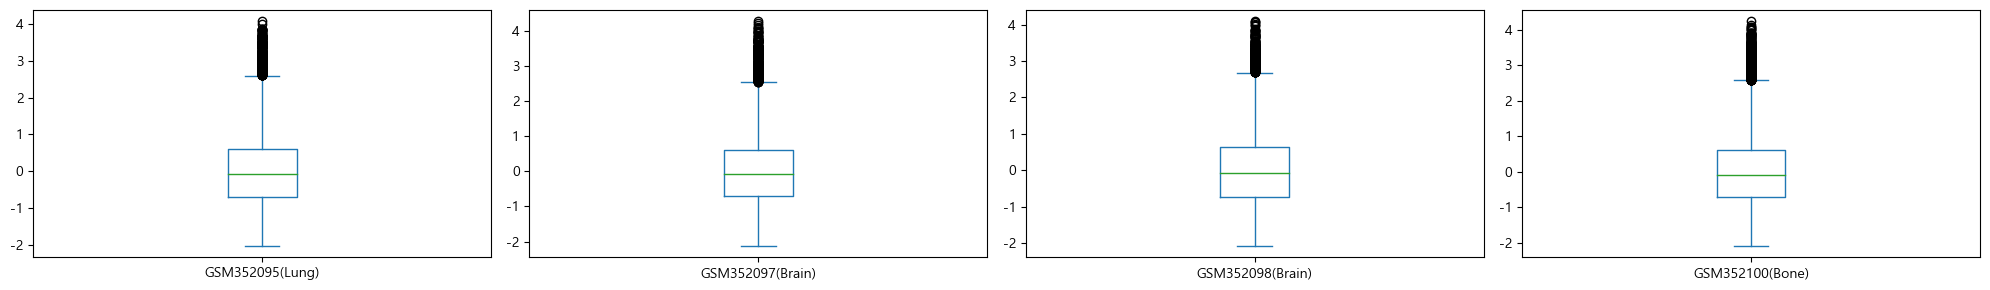

In [20]:
with open("met_geo_norm.pickle","rb") as fr:
    met_geo_norm = pickle.load(fr)

draw_boxplots(met_geo_norm, num_of_col=4)

### geo2

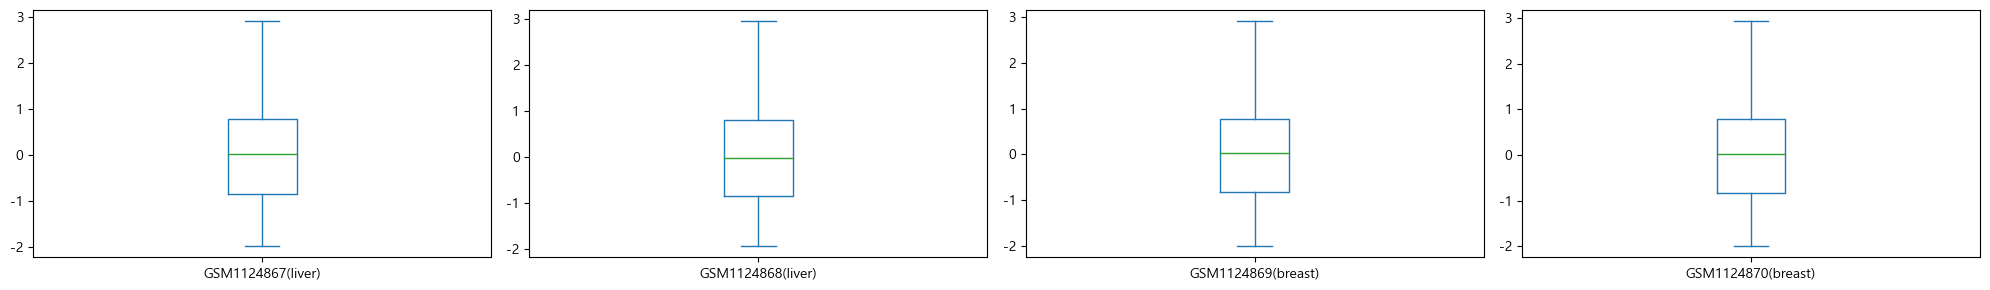

In [21]:
with open("met_geo_norm2.pickle","rb") as fr:
    met_geo_norm2 = pickle.load(fr)

draw_boxplots(met_geo_norm2, num_of_col=4)

### geo3

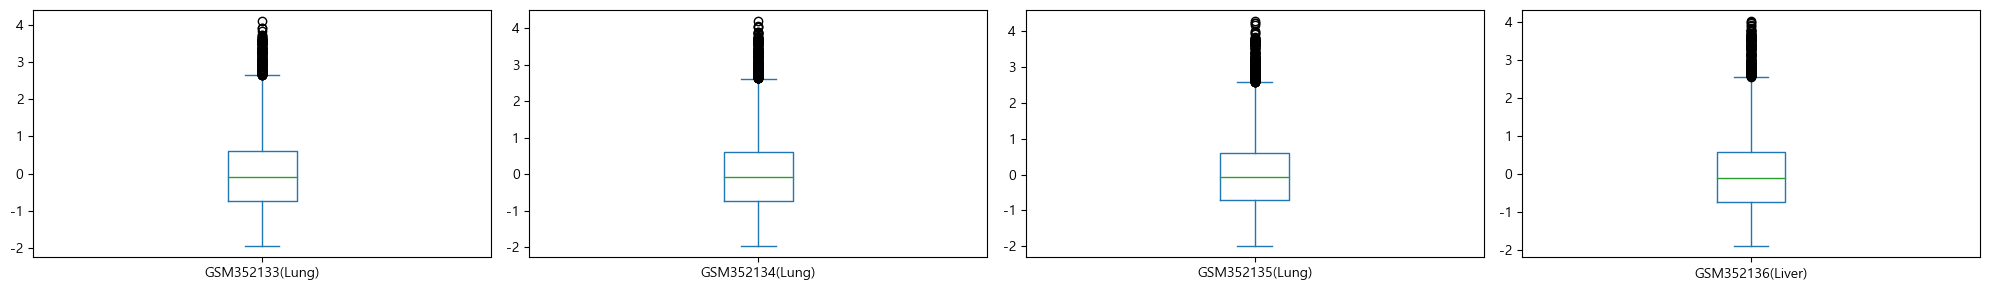

In [22]:
with open("met_geo_norm3.pickle","rb") as fr:
    met_geo_norm3 = pickle.load(fr)

draw_boxplots(met_geo_norm3, num_of_col=4)

## ctc

### ctc1

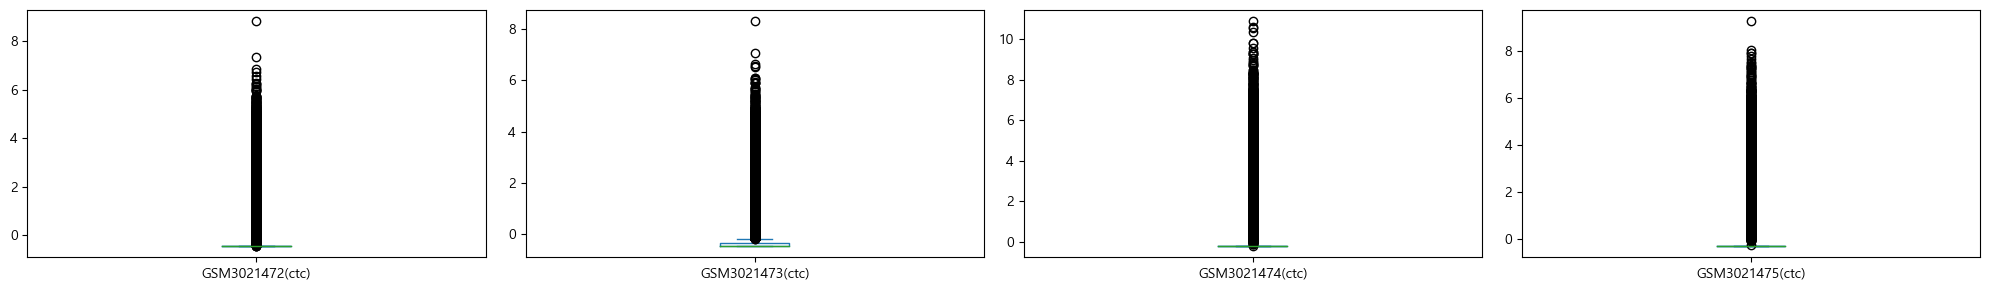

In [23]:
with open("ctc_ctcr_norm.pickle","rb") as fr:
    ctc_ctcr_norm = pickle.load(fr)

draw_boxplots(ctc_ctcr_norm, num_of_col=4)

### ctc2

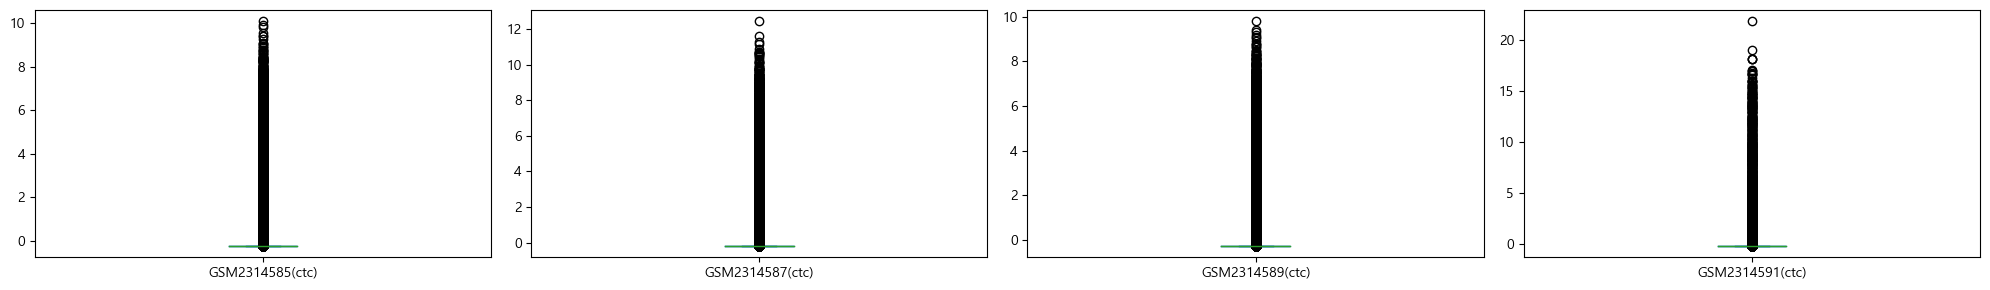

In [24]:
with open("ctc_ctcr_norm2.pickle","rb") as fr:
    ctc_ctcr_norm2 = pickle.load(fr)

draw_boxplots(ctc_ctcr_norm2, num_of_col=4)

### ctc3

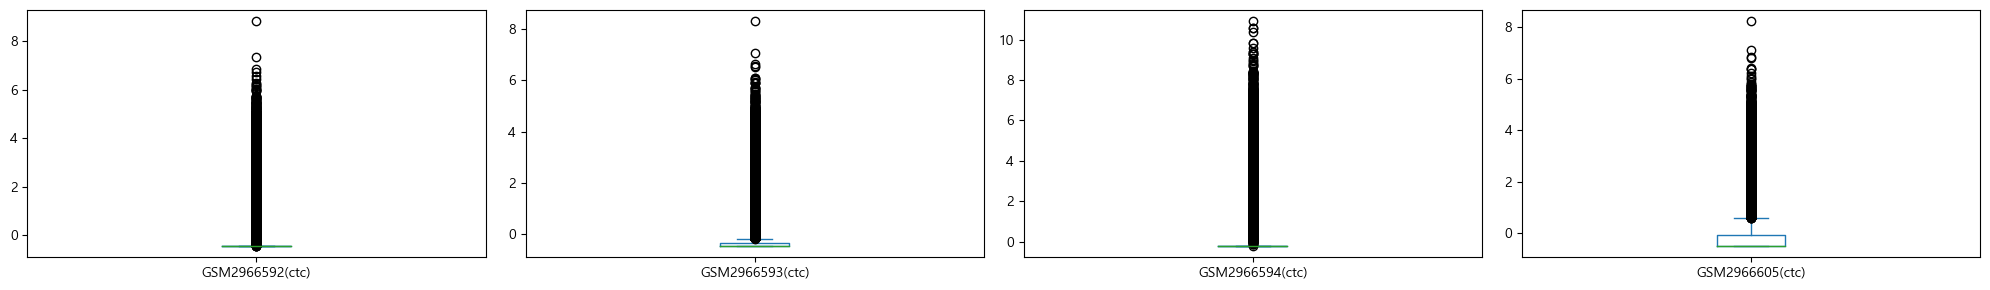

In [25]:
with open("ctc_ctcr_norm3.pickle","rb") as fr:
    ctc_ctcr_norm3 = pickle.load(fr)

draw_boxplots(ctc_ctcr_norm3, num_of_col=4)

### ctc4

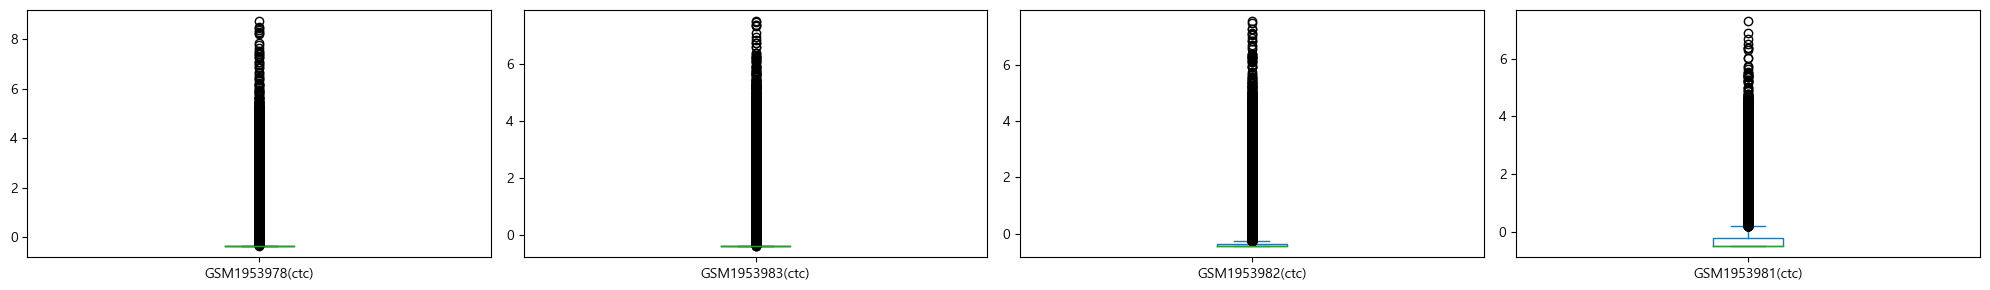

In [26]:
with open("ctc_ctcr_norm4.pickle","rb") as fr:
    ctc_ctcr_norm4 = pickle.load(fr)

draw_boxplots(ctc_ctcr_norm4, num_of_col=4)

## ccle

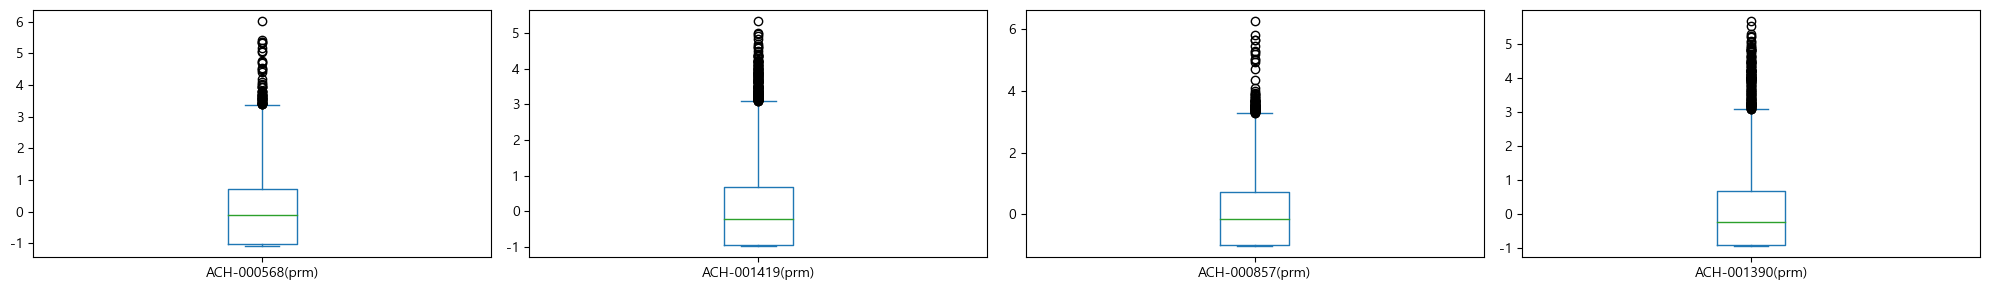

In [27]:
with open("prmMet_ccle_norm.pickle","rb") as fr:
    prmMet_ccle_norm = pickle.load(fr)

draw_boxplots(prmMet_ccle_norm, num_of_col=4)

## merge

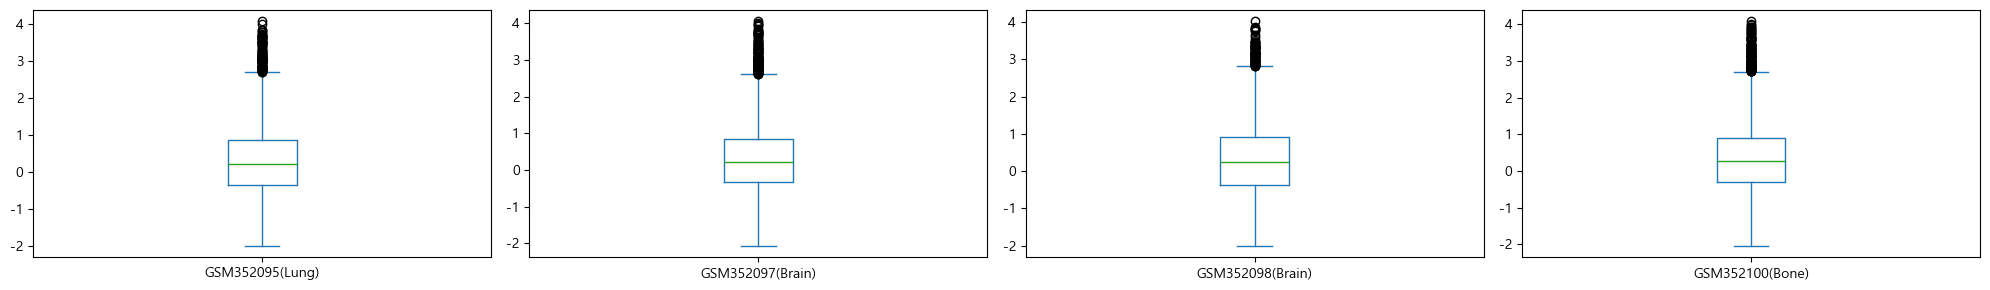

In [28]:
with open("mer_exp.pickle","rb") as fr:
    mer_exp = pickle.load(fr)

draw_boxplots(mer_exp, num_of_col=4)

# data preprocessing

## quantile norm

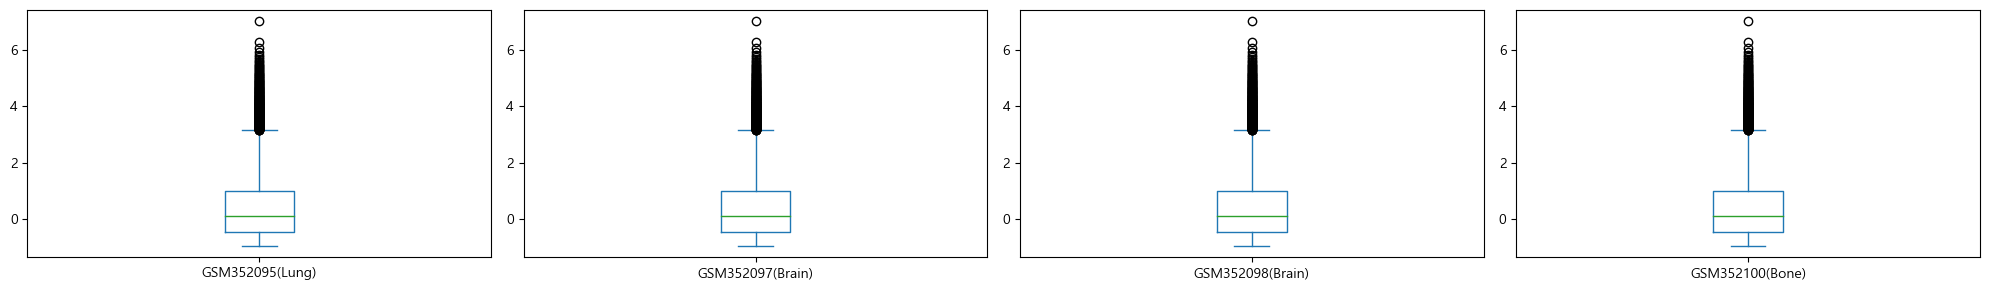

In [29]:
with open("mer_exp_qtNorm.pickle","rb") as fr:
    mer_exp_qtNorm = pickle.load(fr)

draw_boxplots(mer_exp_qtNorm, num_of_col=4)

## pca data

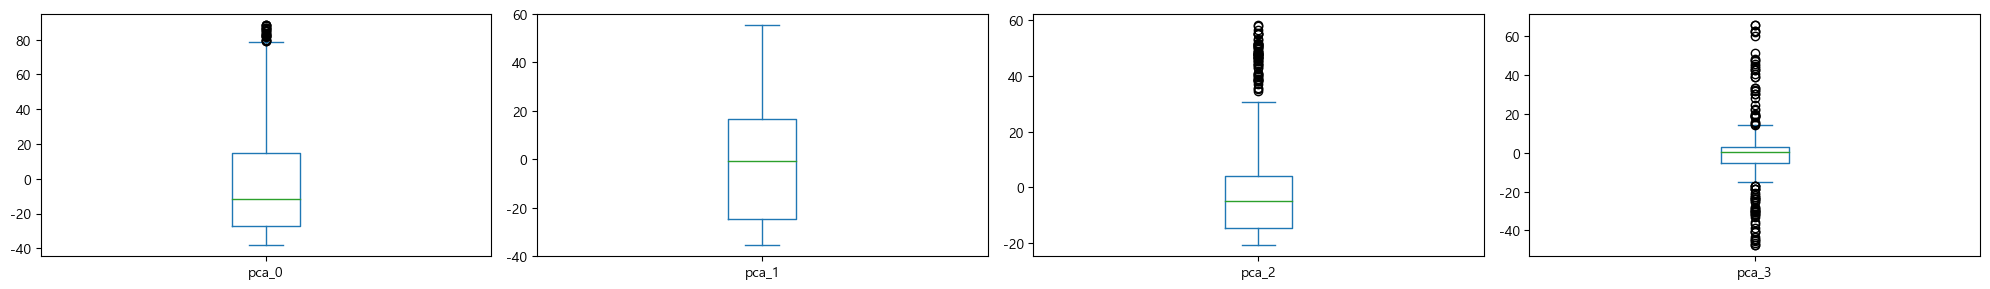

In [30]:
with open("mer_exp_pca.pickle","rb") as fr:
    mer_exp_pca = pickle.load(fr)

draw_boxplots(mer_exp_pca, num_of_col=4)

# modeling

## original datg / pca data

In [33]:
with open("model_df.pickle","rb") as fr:
    model_df = pickle.load(fr)

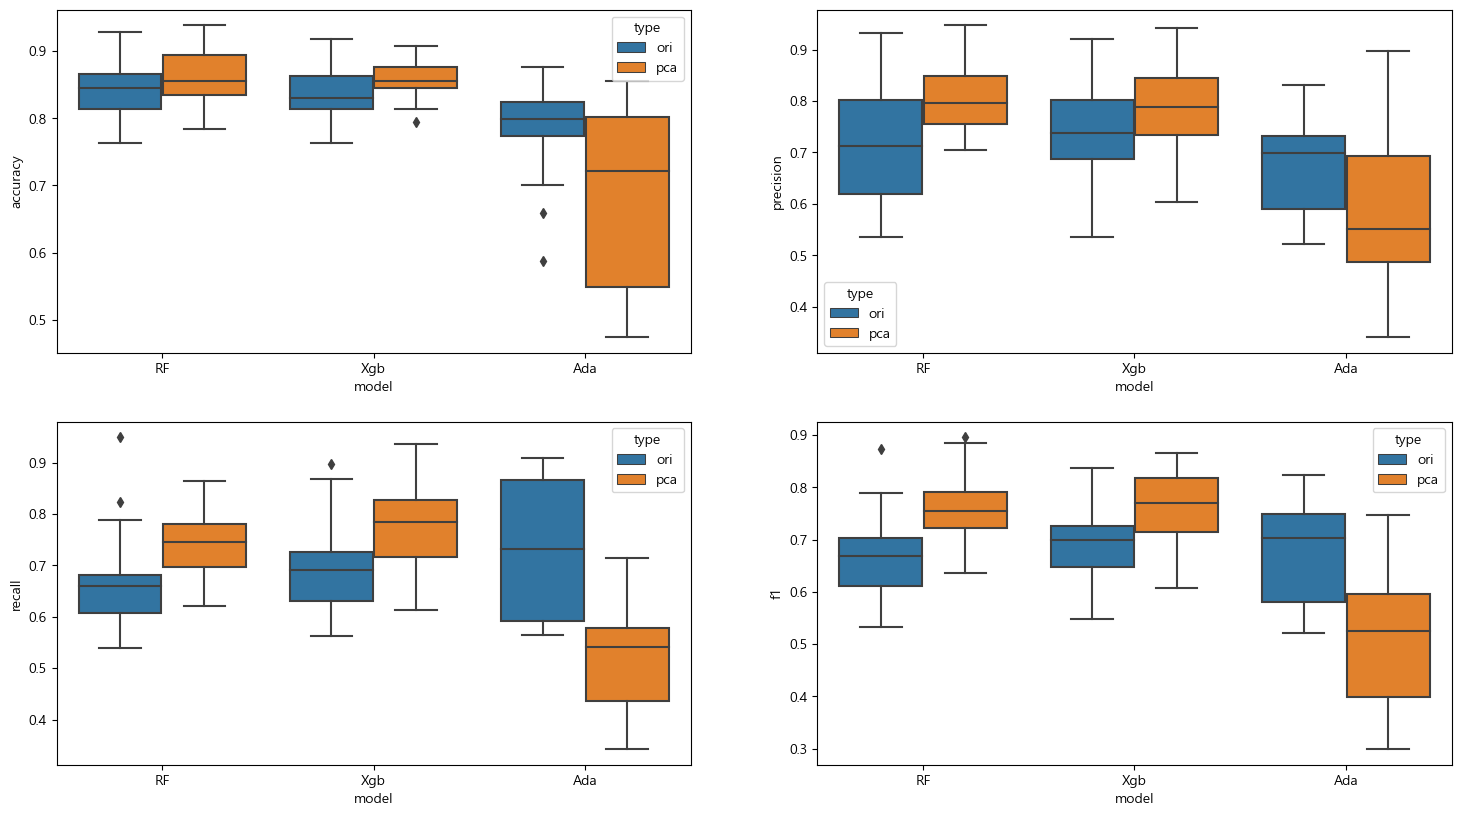

In [34]:
fig = plt.figure(figsize = (18,10), dpi = 100)
axs = fig.subplots(2,2).flatten()

_=sns.boxplot(data = model_df, x = 'model', y = 'accuracy', hue = 'type', ax = axs[0])
_=sns.boxplot(data = model_df, x = 'model', y = 'precision', hue = 'type', ax = axs[1])
_=sns.boxplot(data = model_df, x = 'model', y = 'recall', hue = 'type', ax = axs[2])
_=sns.boxplot(data = model_df, x = 'model', y = 'f1', hue = 'type', ax = axs[3])

# Top imoirtant feature

## top 30 heatmap (XGB)

In [5]:
with open("feature_importance_XGB.pickle","rb") as fr:
    feature_importance_XGB = pickle.load(fr)

<AxesSubplot:xlabel='feature'>

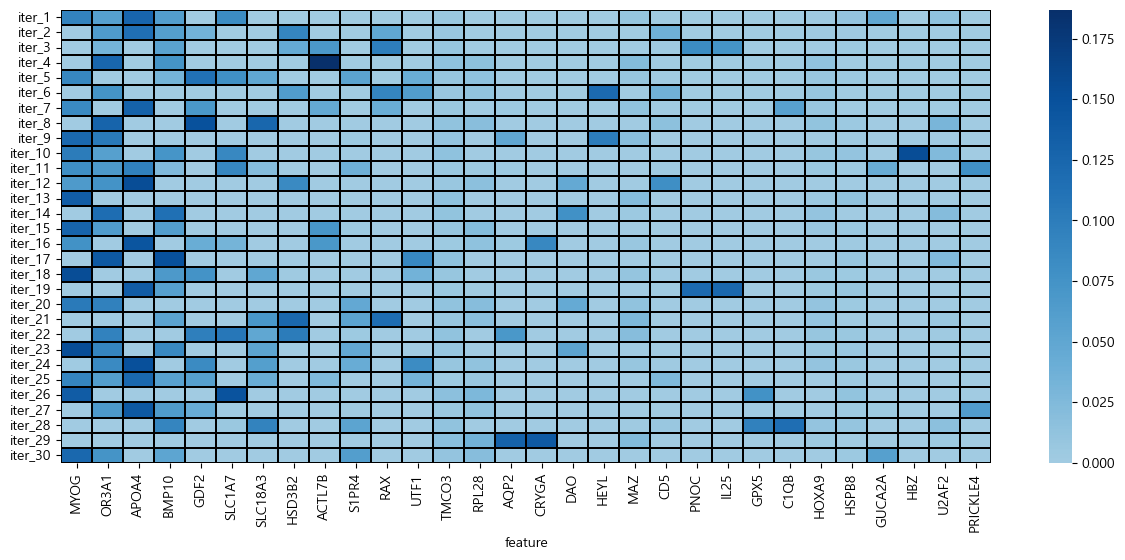

In [6]:
feature_importance_XGB_30 = feature_importance_XGB.astype('float')
feature_importance_XGB_30 = feature_importance_XGB_30[feature_importance_XGB_30.columns[:30]]
feature_importance_XGB_30 = feature_importance_XGB_30.drop(['mean'])

fig1 = plt.figure(figsize = (15,6), dpi = 100)
sns.heatmap(feature_importance_XGB_30, cmap = 'Blues', center = 0.04, linewidths = 0.1, linecolor = 'black')

## top 10 bar (XGB)

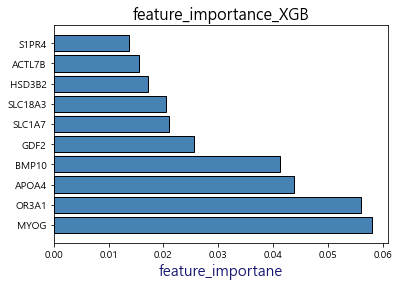

In [7]:
feature_importance_XGB_10 = feature_importance_XGB[feature_importance_XGB.columns[0:10]]
feature_importance_XGB_10_mean = feature_importance_XGB_10.loc[['mean'], :]
name1 = feature_importance_XGB_10_mean.columns

_=plt.barh(name1, feature_importance_XGB_10_mean.loc['mean'].values, edgecolor = 'k', color = 'steelblue')
_=plt.xlabel('feature_importane', fontsize = 15, color = 'midnightblue')
_=plt.title('feature_importance_XGB', fontsize = 16)

# top 마커 유전자 발현

In [8]:
with open("mer_exp_qtNorm1.pickle","rb") as fr:
    mer_exp_qtNorm1 = pickle.load(fr)

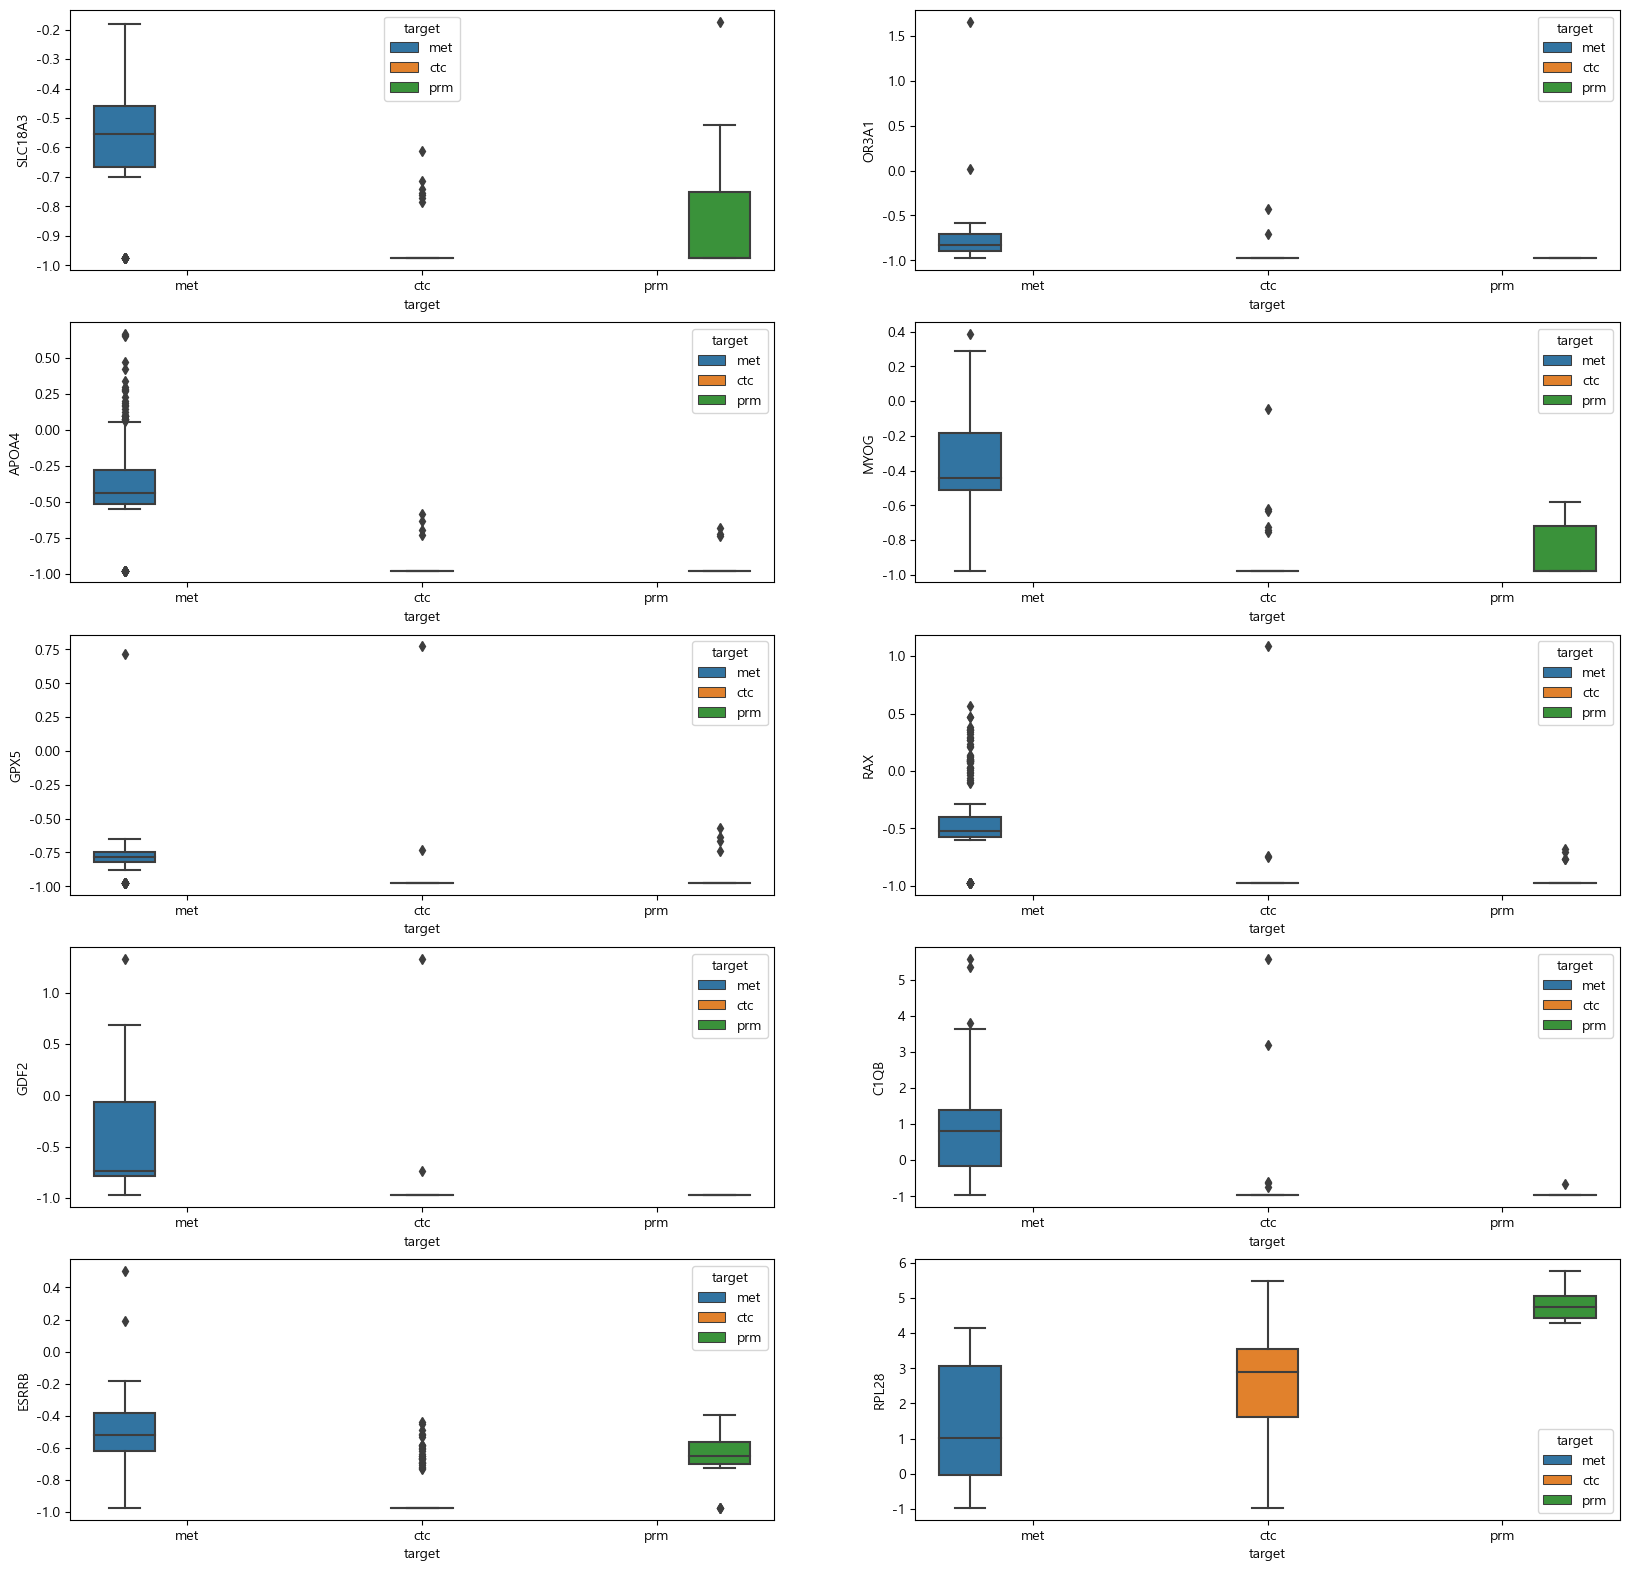

In [9]:
fig = plt.figure(figsize = (20,20), dpi = 100)
axs = fig.subplots(5,2).flatten()

_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'SLC18A3', hue = 'target', ax = axs[0])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'OR3A1', hue = 'target', ax = axs[1])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'APOA4', hue = 'target', ax = axs[2])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'MYOG', hue = 'target', ax = axs[3])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'GPX5', hue = 'target', ax = axs[4])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'RAX', hue = 'target', ax = axs[5])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'GDF2', hue = 'target', ax = axs[6])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'C1QB', hue = 'target', ax = axs[7])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'ESRRB', hue = 'target', ax = axs[8])
_=sns.boxplot(data = mer_exp_qtNorm1, x = 'target', y = 'RPL28', hue = 'target', ax = axs[9])